<a href="https://colab.research.google.com/github/GRACOPORDEUS/atividades_mestrado/blob/main/1107106_220427_lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

from itertools import product
import pandas as pd
import numpy as np
from operator import xor
import math

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

In [4]:
tf.test.gpu_device_name()

'/device:GPU:0'

### Questão 1

**Criando base de dados**

In [15]:
def func_classesQ1(df):

  x = df[0]
  y = df[1]
  z = df[2]

  if (x <= 0.1) & (y <= 0.1) & (z <= 0.1): Classe = 1
  elif (x <= 0.1) & (y <= 0.1) & (z >= 0.9): Classe = 2
  elif (x <= 0.1) & (y >= 0.9) & (z <= 0.1): Classe = 3
  elif (x <= 0.1) & (y >= 0.9) & (z >= 0.9): Classe = 4
  elif (x >= 0.9) & (y <= 0.1) & (z <= 0.1): Classe = 5
  elif (x >= 0.9) & (y <= 0.1) & (z >= 0.9): Classe = 6
  elif (x >= 0.9) & (y >= 0.9) & (z <= 0.1): Classe = 7
  elif (x >= 0.9) & (y >= 0.9) & (z >= 0.9): Classe = 8
  else: Classe = 0

  return Classe

Dados de treino

In [16]:
top_x = np.arange(0.8, 1, 0.01)
top_y = np.arange(0.8, 1, 0.01)
top_z = np.arange(0.8, 1, 0.01)
bot_x = np.arange(0, 0.2, 0.01)
bot_y = np.arange(0, 0.2, 0.01)
bot_z = np.arange(0, 0.2, 0.01)

x = np.array([top_x, bot_x])
y = np.array([top_y, bot_y])
z = np.array([top_z, bot_z])

In [17]:
vertices = pd.DataFrame(product(x, y, z), columns=["x", "y", "z"]) \
    .explode("x") \
    .explode("y") \
    .explode("z") \
    .drop_duplicates() \
    .reset_index(drop=True)

vertices["classes"] = ""

In [18]:
for i in range(len(vertices)):
  df = vertices.loc[i]
  vertices.classes[i] = func_classesQ1(df)

Dados de teste

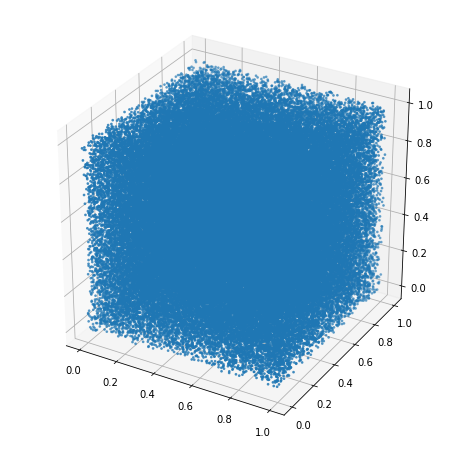

In [19]:
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = plt.axes(projection="3d")

x_data = np.random.uniform(0, 100, (100000,))/100
y_data = np.random.uniform(0, 100, (100000,))/100
z_data = np.random.uniform(0, 100, (100000,))/100

ax.scatter(x_data, y_data, z_data, s = 3)

In [20]:
d = {"x": x_data, 
     "y": y_data, 
     "z": z_data}

test = pd.DataFrame(data = d)
test["y_test"] = ""

In [21]:
for i in range(len(test)):
  df = test.loc[i]
  test.y_test[i] = func_classesQ1(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
# Tamanho da amostra

len(vertices), len(test)

(64000, 100000)

**Modelagem**

In [23]:
X_train = tf.convert_to_tensor(vertices[["x","y","z"]].astype('float'))
y_train = tf.convert_to_tensor(vertices[["classes"]].astype('int'))
y_train = to_categorical(y_train)

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=3 , activation='relu'),
    keras.layers.Dense(units=9, activation='softmax')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

In [ ]:
model.fit(X_train, 
          y_train,
          batch_size = 1,
          epochs = 1)

64000/64000 [==============================] - 83s 1ms/step - loss: 0.1471 - accuracy: 0.8521


Testando

In [ ]:
X_test = tf.convert_to_tensor(test[["x","y","z"]].astype('float'))
y_test = np.array(test[["y_test"]].astype('int'))

In [ ]:
y_pred = model.predict(X_test, verbose=0)

In [ ]:
print(accuracy_score(np.argmax(y_test, axis=-1), np.argmax(y_pred, axis=-1)))

1.0


In [ ]:
plot_test = test[test["y_test"] != 0]

plot_pred = test
plot_pred["y_pred"] = np.argmax(y_pred, axis=-1)
plot_pred = plot_pred[plot_pred["y_pred"] != 0]
plot_pred = plot_pred[plot_pred["y_pred"] != plot_pred["y_test"]]

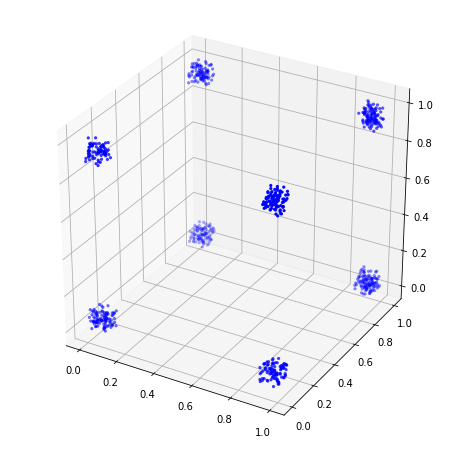

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)

ax = fig.add_subplot(projection='3d')

ax.scatter(plot_test.x, 
           plot_test.y, 
           plot_test.z,
           color='blue',
           linewidth=0.01,
           s = 10)

ax.scatter(plot_pred.x, 
           plot_pred.y, 
           plot_pred.z,
           color='orange',
           linewidth=0.01,
           s = 20)

plt.show()

### Questão 2

#### Item A (xor)

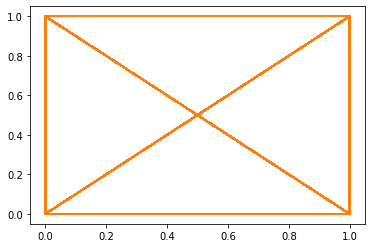

In [10]:
def func_question3a(x, y):
  output = xor(x, y)
  return output
n = 10000
x1 = np.random.rand(n) > 0.5
x2 = np.random.rand(n) > 0.5
y = np.full(n, True)

for i in range(n):
    y[i] = func_question3a(x1[i], x2[i])

plt.plot(x1, y)
plt.plot(x2, y)

plt.show()

In [11]:
d = {"x1": x1, 
     "x2": x2, 
     "y": y}

df = pd.DataFrame(data = d)

In [12]:
split_index = np.random.rand(len(df)) <= 0.7
train_df = df[split_index]
test_df = df[~split_index]

In [13]:
# Tamanho da amostra

len(train_df), len(test_df)

(7054, 2946)

In [58]:
X_train = tf.convert_to_tensor(train_df[["x1","x2"]].astype('bool'))
y_train = tf.convert_to_tensor(train_df[["y"]].astype('bool'))
y_train = to_categorical(y_train)

X_test = tf.convert_to_tensor(test_df[["x1","x2"]].astype('bool'))
y_test = test_df[["y"]].astype('bool')

In [59]:
model = keras.Sequential([
    keras.layers.Flatten(input_dim=2),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=5, activation='relu'),
    keras.layers.Dense(units=2, activation='softmax')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

Epoch 1/5
6250/6250 - 8s - loss: 0.2173 - accuracy: 0.9531 - val_loss: 0.0417 - val_accuracy: 1.0000 - 8s/epoch - 1ms/step
Epoch 2/5
6250/6250 - 7s - loss: 0.0299 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000 - 7s/epoch - 1ms/step
Epoch 3/5
6250/6250 - 7s - loss: 0.0164 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 1.0000 - 7s/epoch - 1ms/step
Epoch 4/5
6250/6250 - 7s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000 - 7s/epoch - 1ms/step
Epoch 5/5
6250/6250 - 7s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000 - 7s/epoch - 1ms/step


<function matplotlib.pyplot.show>

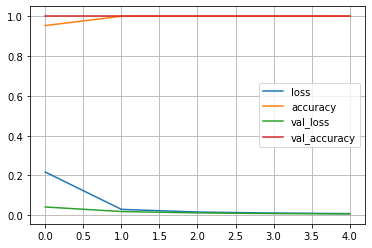

In [60]:
model_hist = model.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 1,
    epochs = 5,
    verbose = 2
    )

df_model = pd.DataFrame(model_hist.history)
df_model.plot()
plt.grid(True)
plt.show

1.0


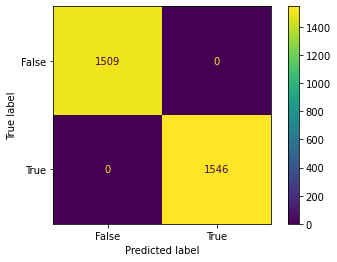

In [61]:
y_pred = model.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

#### Item B (log10)

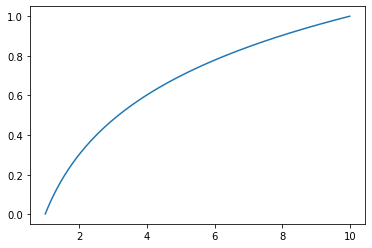

In [2]:
def func_question3b(x):
  output = math.log10(x)
  return output

n = 1000
x = np.random.uniform(1, 10, n)
y = np.zeros((n,), dtype=float)

for i in range(n):
    y[i] = func_question3b(x[i])


d = {"x": x, 
     "y": y}

df = pd.DataFrame(data = d)
df = df.sort_values(by=['x'])

plt.plot(df.x, df.y)
plt.show()

In [3]:
split_index = np.random.rand(len(df)) <= 0.7
train_df = df[split_index]
test_df = df[~split_index]

In [4]:
# Tamanho da amostra

len(train_df), len(test_df)

(705, 295)

In [5]:
X_train = tf.convert_to_tensor(train_df[["x"]].astype('float'))
y_train = tf.convert_to_tensor(train_df[["y"]].astype('float'))

X_test = tf.convert_to_tensor(test_df[["x"]].astype('float'))
y_test = test_df[["y"]].astype('float')

In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_dim=1),
    keras.layers.Dense(units=10, activation='sigmoid'),
    keras.layers.Dense(units=10, activation='sigmoid'),
    keras.layers.Dense(units=1, activation='linear')
])

model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer='adam',
    metrics=[keras.metrics.RootMeanSquaredError()]
    )

Epoch 1/50
20/20 - 1s - loss: 0.0584 - root_mean_squared_error: 0.2417 - val_loss: 0.0910 - val_root_mean_squared_error: 0.3016 - 1s/epoch - 52ms/step
Epoch 2/50
20/20 - 0s - loss: 0.0501 - root_mean_squared_error: 0.2237 - val_loss: 0.0983 - val_root_mean_squared_error: 0.3136 - 104ms/epoch - 5ms/step
Epoch 3/50
20/20 - 0s - loss: 0.0411 - root_mean_squared_error: 0.2027 - val_loss: 0.0749 - val_root_mean_squared_error: 0.2737 - 89ms/epoch - 4ms/step
Epoch 4/50
20/20 - 0s - loss: 0.0335 - root_mean_squared_error: 0.1829 - val_loss: 0.0633 - val_root_mean_squared_error: 0.2515 - 102ms/epoch - 5ms/step
Epoch 5/50
20/20 - 0s - loss: 0.0268 - root_mean_squared_error: 0.1638 - val_loss: 0.0487 - val_root_mean_squared_error: 0.2206 - 90ms/epoch - 5ms/step
Epoch 6/50
20/20 - 0s - loss: 0.0209 - root_mean_squared_error: 0.1444 - val_loss: 0.0431 - val_root_mean_squared_error: 0.2076 - 98ms/epoch - 5ms/step
Epoch 7/50
20/20 - 0s - loss: 0.0159 - root_mean_squared_error: 0.1260 - val_loss: 0.03

<function matplotlib.pyplot.show>

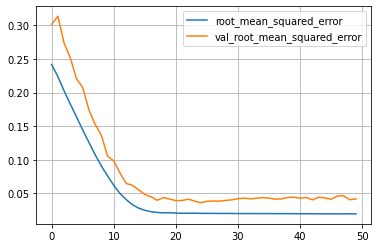

In [7]:
model_hist = model.fit(
    X_train, 
    y_train,
    validation_split = 0.1,
    epochs = 50,
    verbose = 2
    )

df_model = pd.DataFrame(model_hist.history)
df_model = df_model[["root_mean_squared_error", "val_root_mean_squared_error"]]
df_model.plot()
plt.grid(True)
plt.show

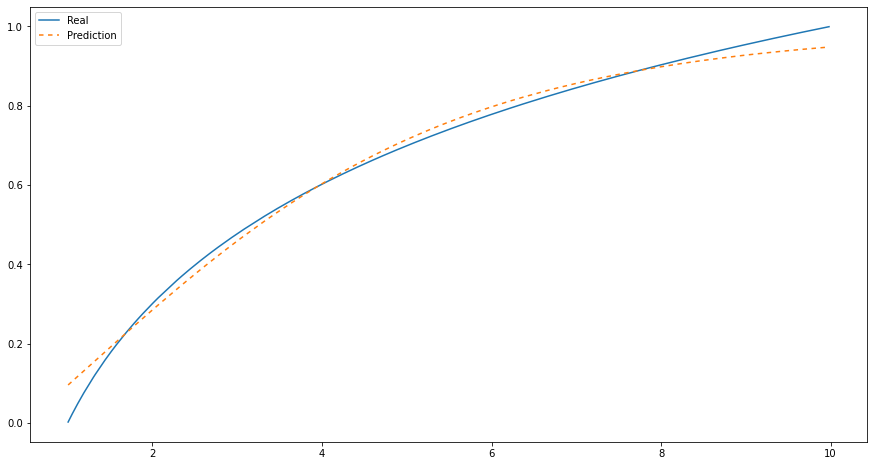

In [8]:
y_pred = model.predict(X_test, verbose=0)

x = test_df[["x"]].astype('float')

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

line1, = ax.plot(x, y_test, label='Real')
line2, = ax.plot(x, y_pred, dashes=[3, 3], label='Prediction')

ax.legend()
plt.show()

#### Item C (f(x) = 10x5+ 5x4+ 2x3– 0.5x2+ 3x + 2)

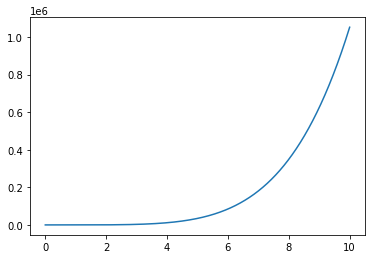

In [69]:
def func_question3c(x):
  output = 10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2
  return output

x = np.arange(0,10,0.001)
n = len(x)

x_log = np.zeros((n,), dtype=float)

y = np.zeros((n,), dtype=float)
y_log = np.zeros((n,), dtype=float)


for i in range(n):
    y[i] = func_question3c(x[i])
    y_log[i] = math.log(y[i], 2)

d = {"x": x, 
     "y": y}

df = pd.DataFrame(data = d)

plt.plot(df.x, df.y)
plt.show()

In [72]:
df = df.sample(frac=1).reset_index(drop=True)

split_index = np.random.rand(len(df)) <= 0.7
train_df = df[split_index]
test_df = df[~split_index]

X_train = tf.convert_to_tensor(train_df[["x"]].astype('float'))
y_train = tf.convert_to_tensor(train_df[["y"]].astype('float'))

X_test = tf.convert_to_tensor(test_df[["x"]].astype('float'))
y_test = test_df[["y"]].astype('float')

In [73]:
# Tamanho da amostra

len(train_df), len(test_df)

(7085, 2915)

In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_dim=1),             
    keras.layers.Dense(units=10, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=20, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=10, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=1, activation='linear')
])

model.compile(
    loss='mean_squared_error',
    optimizer='adam',
    metrics=[keras.metrics.RootMeanSquaredError()]
    )

Epoch 1/300
200/200 - 1s - loss: 266888528.0000 - root_mean_squared_error: 16336.7227 - val_loss: 1143273728.0000 - val_root_mean_squared_error: 33812.3281 - 628ms/epoch - 3ms/step
Epoch 2/300
200/200 - 1s - loss: 166257104.0000 - root_mean_squared_error: 12894.0713 - val_loss: 874229504.0000 - val_root_mean_squared_error: 29567.3711 - 648ms/epoch - 3ms/step
Epoch 3/300
200/200 - 1s - loss: 131010024.0000 - root_mean_squared_error: 11445.9619 - val_loss: 770196992.0000 - val_root_mean_squared_error: 27752.4238 - 622ms/epoch - 3ms/step
Epoch 4/300
200/200 - 1s - loss: 111178080.0000 - root_mean_squared_error: 10544.1016 - val_loss: 825538560.0000 - val_root_mean_squared_error: 28732.1875 - 615ms/epoch - 3ms/step
Epoch 5/300
200/200 - 1s - loss: 99469128.0000 - root_mean_squared_error: 9973.4209 - val_loss: 710434944.0000 - val_root_mean_squared_error: 26653.9844 - 614ms/epoch - 3ms/step
Epoch 6/300
200/200 - 1s - loss: 86187352.0000 - root_mean_squared_error: 9283.7139 - val_loss: 52066

<function matplotlib.pyplot.show>

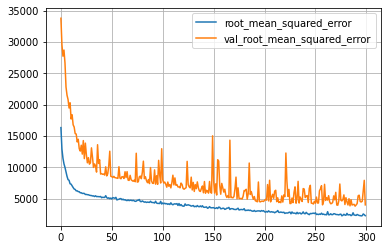

In [74]:
model_hist = model.fit(
    X_train, 
    y_train,
    validation_split = 0.1,
    epochs = 300,
    verbose = 2
    )

df_model = pd.DataFrame(model_hist.history)
df_model = df_model[["root_mean_squared_error", "val_root_mean_squared_error"]]
df_model.plot()
plt.grid(True)
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


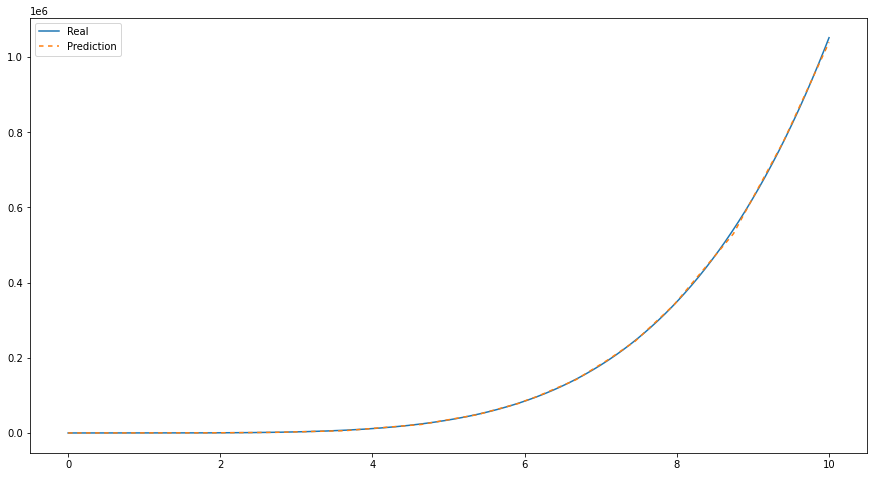

In [85]:
y_pred = model.predict(X_test, verbose=0)

df_pred = test_df
df_pred['pred'] = y_pred
df_pred = df_pred.sort_values(by=['x'])


fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

line1, = ax.plot(df_pred.x, df_pred.y, label='Real')
line2, = ax.plot(df_pred.x, df_pred.pred, dashes=[3, 3], label='Prediction')

ax.legend()
plt.show()

### Questão 3

Criação da base de treino

In [ ]:
def func_question3(n):
  x = np.random.uniform(-1,1,n)
  y = np.random.uniform(-1,1,n)

  df = pd.DataFrame(data={"x":[1.0], "y":[0.1], "Class":[1]})

  for i in range(n):
    if (y[i]<=1-x[i]) & (x[i]>=0) & (y[i]>=0): df.loc[len(df)] = [x[i],y[i],1]
    elif (y[i]<=x[i]+1) & (x[i]<=0) & (y[i]>=0): df.loc[len(df)] = [x[i],y[i],2]
    elif (y[i]>=-x[i]-1) & (x[i]<=0) & (y[i]<=0): df.loc[len(df)] = [x[i],y[i],3]
    elif (y[i]>=x[i]-1) & (x[i]>=0) & (y[i]<=0): df.loc[len(df)] = [x[i],y[i],4]
    elif (y[i]>=1-x[i]) & (x[i]>=0) & (y[i]>=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],5]
    elif (y[i]>=x[i]+1) & (x[i]<=0) & (y[i]>=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],6]
    elif (y[i]<=-x[i]-1) & (x[i]<=0) & (y[i]<=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],7]
    elif (y[i]<=x[i]-1) & (x[i]>=0) & (y[i]<=0) & (x[i]**2+y[i]**2<=1): df.loc[len(df)] = [x[i],y[i],8]
  
  return df

In [ ]:
df = func_question3(10000)

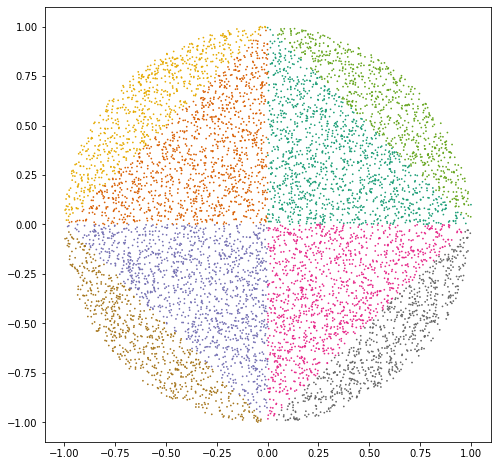

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(df.x,
            df.y,
            c=df["Class"], 
            cmap= "Dark2",
            s = 0.5)

In [ ]:
split_index = np.random.rand(len(df)) <= 0.7
train_df = df[split_index]
test_df = df[~split_index]

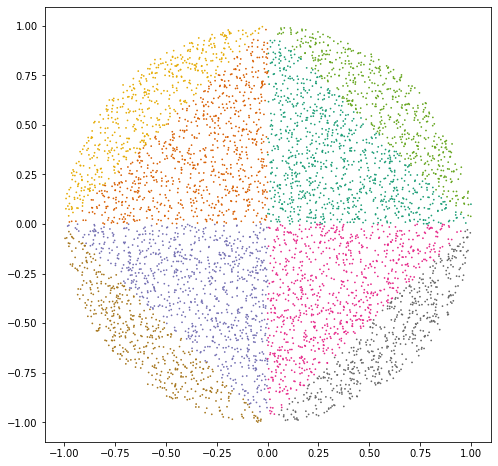

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(train_df.x,
            train_df.y,
            c=train_df["Class"], 
            cmap= "Dark2",
            s = 0.5)

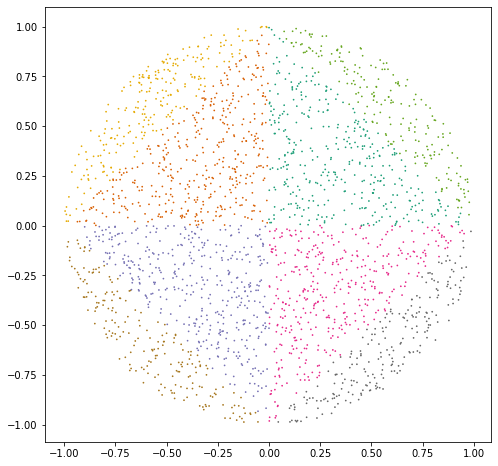

In [ ]:
fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=test_df["Class"], 
            cmap= "Dark2",
            s = 0.5)

In [ ]:
X_train = tf.convert_to_tensor(train_df[["x","y"]].astype('float'))
y_train = tf.convert_to_tensor(train_df[["Class"]].astype('int'))
y_train = to_categorical(y_train)

In [ ]:
X_test = tf.convert_to_tensor(test_df[["x","y"]].astype('float'))
y_test = np.array(test_df[["Class"]].astype('int'))

Modelagem

#### Rede básica

In [ ]:
model_normal = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=2 , activation='relu'),
    keras.layers.Dense(units=9, activation='softmax')
])

model_normal.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
    )

Epoch 1/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 1s/epoch - 3ms/step
Epoch 2/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 837ms/epoch - 3ms/step
Epoch 3/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 572ms/epoch - 2ms/step
Epoch 4/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 591ms/epoch - 2ms/step
Epoch 5/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 617ms/epoch - 2ms/step
Epoch 6/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 601ms/epoch - 2ms/step
Epoch 7/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 573ms/epoch - 2ms/step
Epoch 8/20
328/328 - 1s - loss: 0.3308 - accuracy: 0.1666 - val_loss: 0.3303 - val_accuracy: 0.1828 - 588ms/epoch - 2ms/step
Epo

<function matplotlib.pyplot.show>

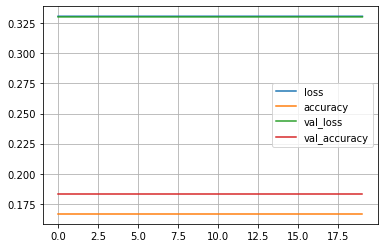

In [ ]:
model = model_normal.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 20,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.14820913956360643


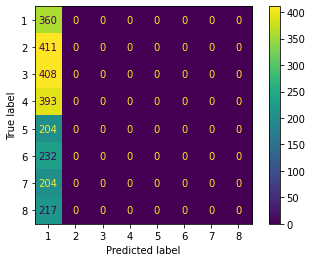

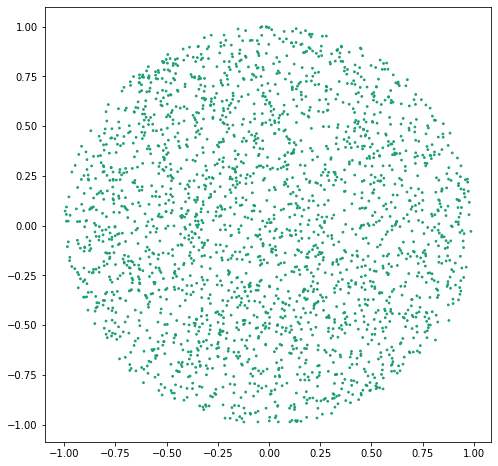

In [ ]:
y_pred_normal = model_normal.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_normal, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_normal, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_normal, axis=-1), 
            cmap= "Dark2",
            s = 3)

#### Rede com momentum

In [ ]:
model_momentum = keras.Sequential([
    keras.layers.Dense(units=1, input_dim=2 , activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=9, activation='softmax')
])

opt = keras.optimizers.SGD(
    learning_rate=0.001, 
    momentum=0.9, 
    nesterov=True
    )

model_momentum.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
    )

Epoch 1/20
328/328 - 0s - loss: 0.2923 - accuracy: 0.3259 - val_loss: 0.2922 - val_accuracy: 0.3346 - 472ms/epoch - 1ms/step
Epoch 2/20
328/328 - 0s - loss: 0.2920 - accuracy: 0.3282 - val_loss: 0.2918 - val_accuracy: 0.3346 - 466ms/epoch - 1ms/step
Epoch 3/20
328/328 - 0s - loss: 0.2916 - accuracy: 0.3294 - val_loss: 0.2914 - val_accuracy: 0.3327 - 459ms/epoch - 1ms/step
Epoch 4/20
328/328 - 0s - loss: 0.2913 - accuracy: 0.3296 - val_loss: 0.2911 - val_accuracy: 0.3309 - 454ms/epoch - 1ms/step
Epoch 5/20
328/328 - 0s - loss: 0.2910 - accuracy: 0.3306 - val_loss: 0.2907 - val_accuracy: 0.3309 - 481ms/epoch - 1ms/step
Epoch 6/20
328/328 - 0s - loss: 0.2906 - accuracy: 0.3318 - val_loss: 0.2904 - val_accuracy: 0.3364 - 409ms/epoch - 1ms/step
Epoch 7/20
328/328 - 0s - loss: 0.2903 - accuracy: 0.3337 - val_loss: 0.2900 - val_accuracy: 0.3327 - 451ms/epoch - 1ms/step
Epoch 8/20
328/328 - 0s - loss: 0.2900 - accuracy: 0.3343 - val_loss: 0.2897 - val_accuracy: 0.3327 - 475ms/epoch - 1ms/step


<function matplotlib.pyplot.show>

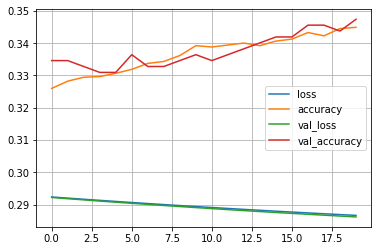

In [ ]:
model = model_momentum.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 20,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.3668176204199259


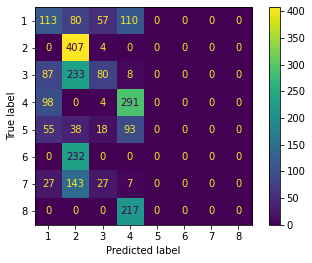

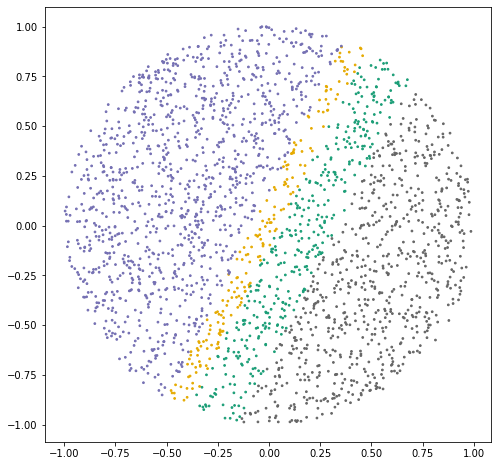

In [ ]:
y_pred_momentum = model_momentum.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_momentum, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_momentum, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_momentum, axis=-1), 
            cmap= "Dark2",
            s = 3)

#### Teste com rede mais robusta

In [ ]:
model_momentum_power = keras.Sequential([
    keras.layers.Flatten(input_dim=2),
    keras.layers.Dense(units=9, activation='relu', kernel_initializer="he_normal"),
    keras.layers.Dense(units=100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=100, activation='relu', kernel_initializer="he_normal"),
    keras.layers.BatchNormalization(),               
    keras.layers.Dense(units=9, activation='softmax')
])

opt = keras.optimizers.SGD(
    learning_rate=0.0005, 
    momentum=0.9, 
    nesterov=True
    )

model_momentum_power.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
    )

Epoch 1/10
328/328 - 1s - loss: 0.1983 - accuracy: 0.8301 - val_loss: 0.1693 - val_accuracy: 0.8958 - 605ms/epoch - 2ms/step
Epoch 2/10
328/328 - 1s - loss: 0.1812 - accuracy: 0.8417 - val_loss: 0.1537 - val_accuracy: 0.9068 - 583ms/epoch - 2ms/step
Epoch 3/10
328/328 - 1s - loss: 0.1686 - accuracy: 0.8378 - val_loss: 0.1418 - val_accuracy: 0.9104 - 599ms/epoch - 2ms/step
Epoch 4/10
328/328 - 1s - loss: 0.1582 - accuracy: 0.8476 - val_loss: 0.1319 - val_accuracy: 0.9250 - 581ms/epoch - 2ms/step
Epoch 5/10
328/328 - 1s - loss: 0.1482 - accuracy: 0.8505 - val_loss: 0.1242 - val_accuracy: 0.9305 - 575ms/epoch - 2ms/step
Epoch 6/10
328/328 - 1s - loss: 0.1398 - accuracy: 0.8625 - val_loss: 0.1151 - val_accuracy: 0.9305 - 593ms/epoch - 2ms/step
Epoch 7/10
328/328 - 1s - loss: 0.1321 - accuracy: 0.8629 - val_loss: 0.1068 - val_accuracy: 0.9250 - 560ms/epoch - 2ms/step
Epoch 8/10
328/328 - 1s - loss: 0.1261 - accuracy: 0.8708 - val_loss: 0.1018 - val_accuracy: 0.9342 - 589ms/epoch - 2ms/step


<function matplotlib.pyplot.show>

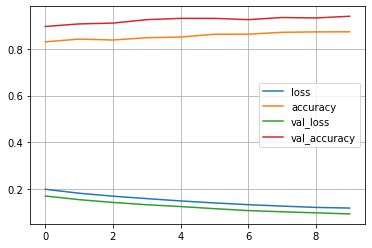

In [ ]:
model = model_momentum_power.fit(
    X_train, 
    y_train,
    shuffle = True,
    validation_split = 0.1,
    batch_size = 15,
    epochs = 10,
    verbose = 2
    )

df_model = pd.DataFrame(model.history)
df_model.plot()
plt.grid(True)
plt.show

0.9526554137505147


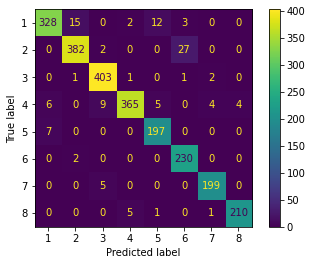

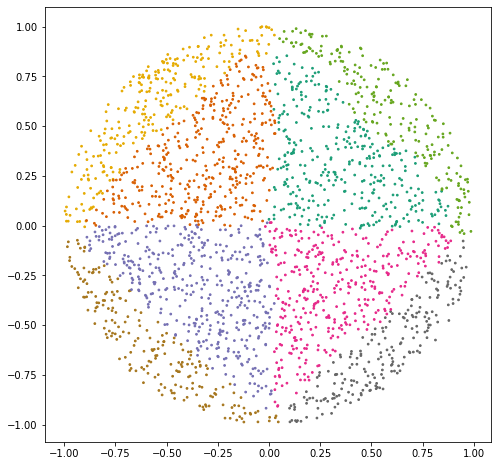

In [ ]:
y_pred_momentum2 = model_momentum_power.predict(X_test, verbose=0)

conf_matrix = confusion_matrix(
    y_true = y_test,
    y_pred = np.argmax(y_pred_momentum2, axis=-1)
    )

labels = np.unique(y_test)

print(accuracy_score(y_test, np.argmax(y_pred_momentum2, axis=-1)))
plot_cm = ConfusionMatrixDisplay(
    confusion_matrix = conf_matrix,
    display_labels = labels
    ) \
    .plot()

plt.show()

fig = plt.figure()
fig.set_size_inches(8, 8)
plt.scatter(test_df.x,
            test_df.y,
            c=np.argmax(y_pred_momentum2, axis=-1), 
            cmap= "Dark2",
            s = 3)

### Questão 4

x(n) = sen
2
(n) + cos(n+cos(n)).

In [4]:
def func_question4(x):
  output = np.sin(x)**2+np.cos(x+np.cos(x))
  return output

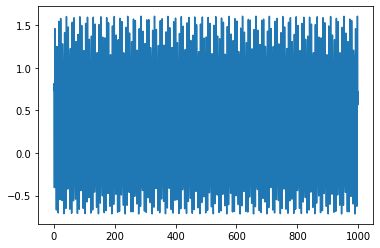

In [5]:
arr = np.arange(1,1001,1)

df = func_question4(arr)

plt.plot(range(len(df)), df)
plt.show()

In [6]:
a = df.reshape(1000, 1)
a = a[:990]
for i in range(1,9):
  temp = df.reshape(1000, 1)
  temp = temp[i:990+i]
  a = np.concatenate((a, temp), axis = 1)

y = a[9:, :3]
x = a[:981]

In [7]:
x[0:5], y[0:5]

(array([[ 0.73856271,  0.81376534, -0.40531079, -0.40635904,  1.46023929,
          0.85753803,  0.53154379,  0.97831141, -0.06289252],
        [ 0.81376534, -0.40531079, -0.40635904,  1.46023929,  0.85753803,
          0.53154379,  0.97831141, -0.06289252, -0.66943422],
        [-0.40531079, -0.40635904,  1.46023929,  0.85753803,  0.53154379,
          0.97831141, -0.06289252, -0.66943422,  1.00883171],
        [-0.40635904,  1.46023929,  0.85753803,  0.53154379,  0.97831141,
         -0.06289252, -0.66943422,  1.00883171,  1.24965838],
        [ 1.46023929,  0.85753803,  0.53154379,  0.97831141, -0.06289252,
         -0.66943422,  1.00883171,  1.24965838,  0.40424538]]),
 array([[-0.66943422,  1.00883171,  1.24965838],
        [ 1.00883171,  1.24965838,  0.40424538],
        [ 1.24965838,  0.40424538,  0.98173266],
        [ 0.40424538,  0.98173266,  0.31991192],
        [ 0.98173266,  0.31991192, -0.70364404]]))

In [8]:
x.shape, y.shape

((981, 9), (981, 3))

In [9]:
len(y)*0.7

686.6999999999999

In [10]:
x_train = x[:686]
y_train = y[:686]

x_test = x[687:]
y_test = y[687:]

In [11]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((686, 9), (686, 3), (294, 9), (294, 3))

In [12]:
X_train = tf.convert_to_tensor(x_train.astype('float'))
Y_train = tf.convert_to_tensor(x_test.astype('float'))

X_test = tf.convert_to_tensor(x_test.astype('float'))
Y_test = y_test.astype('float')

Modelagem

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_dim=9),
    keras.layers.Dense(units=10, activation='linear', kernel_initializer="he_normal"),
    keras.layers.Dense(units=10, activation='linear', kernel_initializer="he_normal"),
    keras.layers.Dense(units=3, activation='linear')
])


model.compile(
    loss='mean_squared_error',
    optimizer='sgd',
    metrics=[keras.metrics.RootMeanSquaredError()]
    )

Epoch 1/10
617/617 - 2s - loss: 0.0838 - root_mean_squared_error: 0.2895 - val_loss: 0.0127 - val_root_mean_squared_error: 0.1125 - 2s/epoch - 3ms/step
Epoch 2/10
617/617 - 1s - loss: 0.0151 - root_mean_squared_error: 0.1231 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935 - 681ms/epoch - 1ms/step
Epoch 3/10
617/617 - 1s - loss: 0.0115 - root_mean_squared_error: 0.1072 - val_loss: 0.0070 - val_root_mean_squared_error: 0.0834 - 670ms/epoch - 1ms/step
Epoch 4/10
617/617 - 1s - loss: 0.0094 - root_mean_squared_error: 0.0969 - val_loss: 0.0058 - val_root_mean_squared_error: 0.0763 - 652ms/epoch - 1ms/step
Epoch 5/10
617/617 - 1s - loss: 0.0080 - root_mean_squared_error: 0.0893 - val_loss: 0.0050 - val_root_mean_squared_error: 0.0709 - 666ms/epoch - 1ms/step
Epoch 6/10
617/617 - 1s - loss: 0.0069 - root_mean_squared_error: 0.0832 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0666 - 646ms/epoch - 1ms/step
Epoch 7/10
617/617 - 1s - loss: 0.0061 - root_mean_squared_error: 0.0782 

<function matplotlib.pyplot.show>

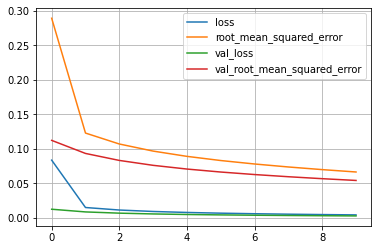

In [29]:
model_hist = model.fit(
    X_train, 
    y_train,
    shuffle = False,
    validation_split = 0.1,
    batch_size = 1,
    epochs = 10,
    verbose = 2
    )

df_model = pd.DataFrame(model_hist.history)
df_model.plot()
plt.grid(True)
plt.show

In [30]:
y_pred = model.predict(X_test, verbose=0)

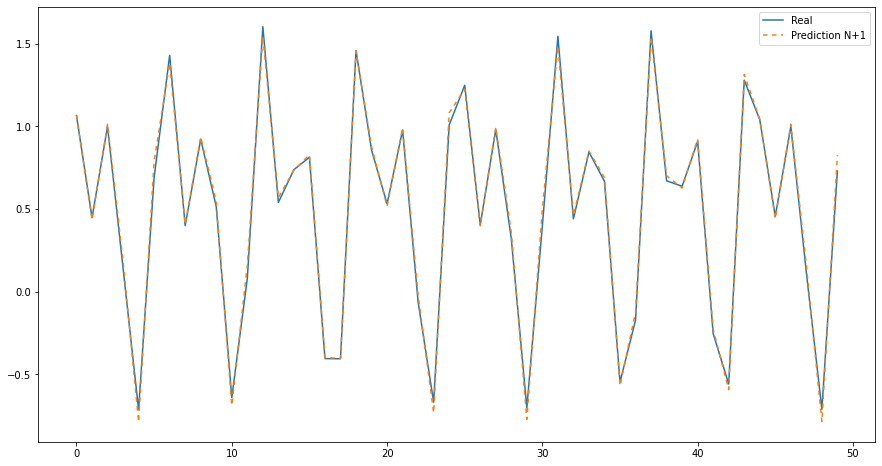

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,0]
y_pred_n1 = y_pred[:50,0]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+1')

ax.legend()
plt.show()

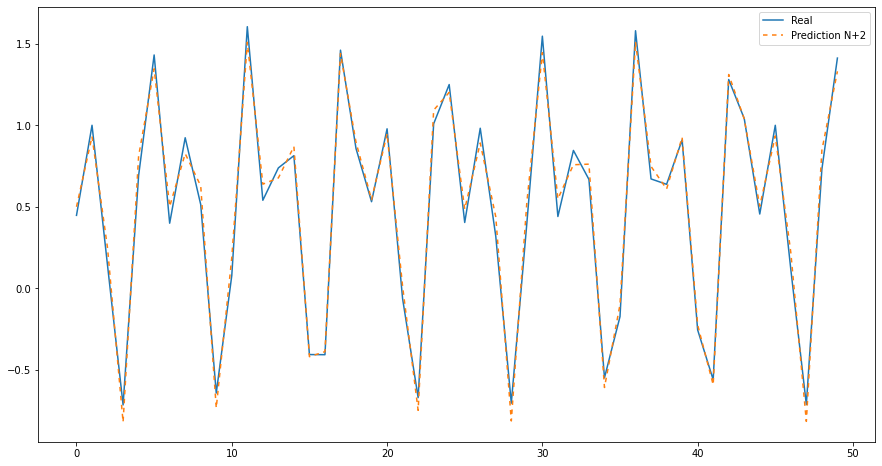

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,1]
y_pred_n1 = y_pred[:50,1]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+2')

ax.legend()
plt.show()

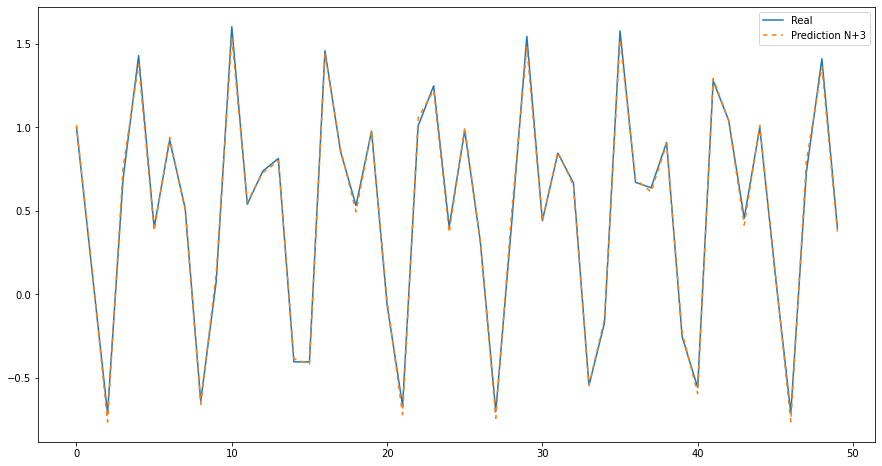

In [33]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)


y_real = Y_test[:50,2]
y_pred_n1 = y_pred[:50,2]

x = range(len(y_real))

line1, = ax.plot(x, y_real, label='Real')
line2, = ax.plot(x, y_pred_n1, dashes=[3, 3], label='Prediction N+3')

ax.legend()
plt.show()